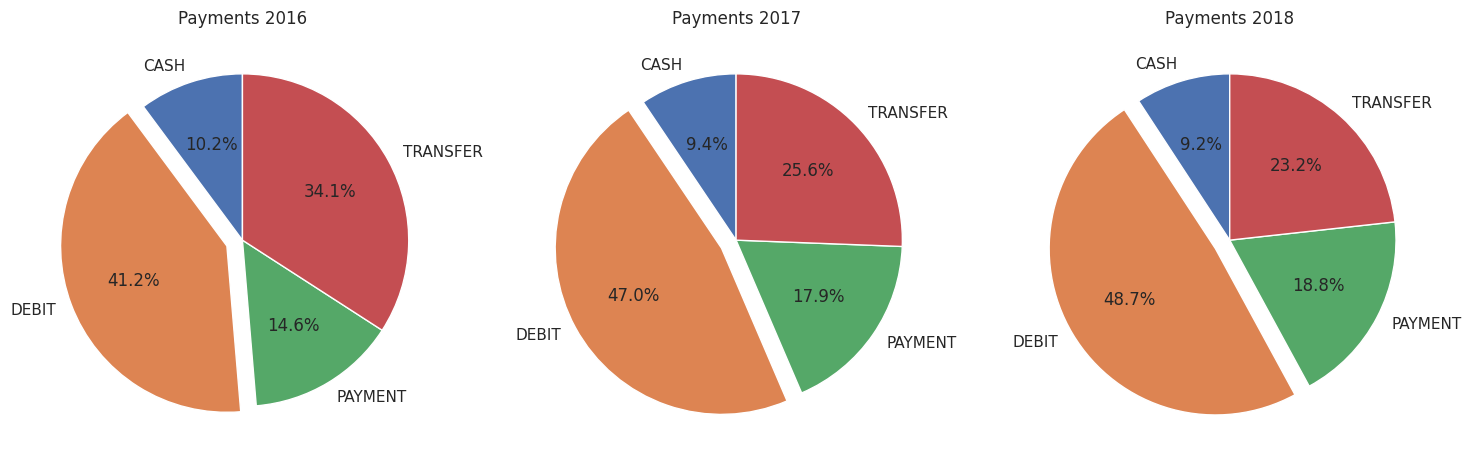

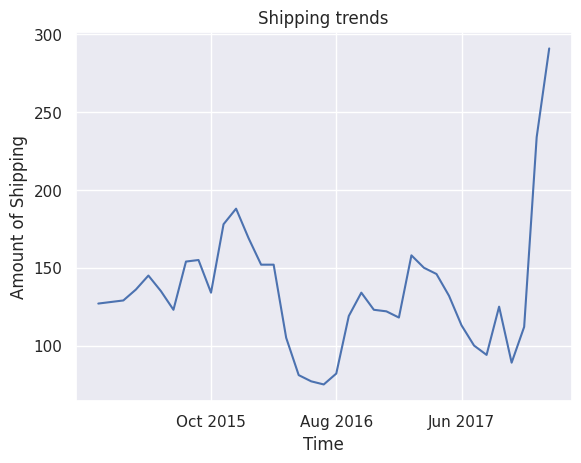

In [1]:
#import libraries (step 1)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns
sns.set()

#get data (step 2)
df_OrderData=pd.read_html(str(BeautifulSoup(requests.get('https://fakeaccountfornow.github.io/BA/').text, 'html.parser').find('table')),header=0)[0]
df_ShippingData=pd.read_csv('https://raw.githubusercontent.com/MarcelinoCodes/Week1_HW/main/ShippingData.csv')

#Explore the data (step 3)
#We just looked at it and thought about the potential plots we could make
#create the necessary functions
def getyear(time):
    return int(time[0:4])
def getmonth(time):
    return int(time[5:7])

#prepare/clean the data (step 4)
df_ShippingData['shipping_date_DateOrders_year']=df_ShippingData['shipping_date_DateOrders'].apply(getyear)
df_ShippingData['shipping_date_DateOrders_month']=df_ShippingData['shipping_date_DateOrders'].apply(getmonth)
df_OrderData['order_date_DateOrders']=df_OrderData['order_date_DateOrders'].apply(getyear)
df_OrderData=df_OrderData[df_OrderData['Type']!='PAYMENT_PAYMENTicana Azuliarenaliana']

df_OrderData[['Benefit_per_order','Type']].groupby('Type').sum()/df_OrderData[['Benefit_per_order','Type']].groupby('Type').sum()['Benefit_per_order'].sum()

year=2016
df_OrderData_2016=df_OrderData[df_OrderData['order_date_DateOrders']==year]
df_OrderData_2016=df_OrderData_2016[['order_date_DateOrders','Type']].groupby('Type').sum()/year
df_OrderData_2016['order_date_DateOrders']=df_OrderData_2016['order_date_DateOrders']/df_OrderData_2016['order_date_DateOrders'].sum()

year=2017
df_OrderData_2017=df_OrderData[df_OrderData['order_date_DateOrders']==year]
df_OrderData_2017=df_OrderData_2017[['order_date_DateOrders','Type']].groupby('Type').sum()/year
df_OrderData_2017['order_date_DateOrders']=df_OrderData_2017['order_date_DateOrders']/df_OrderData_2017['order_date_DateOrders'].sum()

year=2018
df_OrderData_2018=df_OrderData[df_OrderData['order_date_DateOrders']==year]
df_OrderData_2018=df_OrderData_2018[['order_date_DateOrders','Type']].groupby('Type').sum()/year
df_OrderData_2018['order_date_DateOrders']=df_OrderData_2018['order_date_DateOrders']/df_OrderData_2018['order_date_DateOrders'].sum()

sum(df_OrderData['order_date_DateOrders']==2018) #271 data points

types2016 = df_OrderData_2016.index.to_list()
percentages2016 = df_OrderData_2016['order_date_DateOrders']  # Percentages for each category

types2017 = df_OrderData_2017.index.to_list()
percentages2017 = df_OrderData_2017['order_date_DateOrders']  # Percentages for each category

types2018 = df_OrderData_2018.index.to_list()
percentages2018 = df_OrderData_2018['order_date_DateOrders']  # Percentages for each category

df_ShippingData['shipping_date_DateOrders_year']=df_ShippingData['shipping_date_DateOrders'].apply(getyear)
df_ShippingData['shipping_date_DateOrders_month']=df_ShippingData['shipping_date_DateOrders'].apply(getmonth)

#Visualize the data (step 6)
# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first pie chart
axes[0].pie(percentages2016, labels=types2016, explode=(0,.1,0,0), autopct='%1.1f%%', startangle=90)
axes[0].set_title('Payments 2016')

# Plot the second pie chart
axes[1].pie(percentages2017, labels=types2017, explode=(0,.1,0,0), autopct='%1.1f%%', startangle=90)
axes[1].set_title('Payments 2017')

# Plot the third pie chart
axes[2].pie(percentages2018, labels=types2018, explode=(0,.1,0,0), autopct='%1.1f%%', startangle=90)
axes[2].set_title('Payments 2018')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


#time series data
df_ShippingData_2015=df_ShippingData[df_ShippingData[['shipping_date_DateOrders_year','shipping_date_DateOrders_month']]['shipping_date_DateOrders_year']==2015].groupby('shipping_date_DateOrders_month').size()
df_ShippingData_2016=df_ShippingData[df_ShippingData[['shipping_date_DateOrders_year','shipping_date_DateOrders_month']]['shipping_date_DateOrders_year']==2016].groupby('shipping_date_DateOrders_month').size()
df_ShippingData_2017=df_ShippingData[df_ShippingData[['shipping_date_DateOrders_year','shipping_date_DateOrders_month']]['shipping_date_DateOrders_year']==2017].groupby('shipping_date_DateOrders_month').size()
df_ShippingData_2018=df_ShippingData[df_ShippingData[['shipping_date_DateOrders_year','shipping_date_DateOrders_month']]['shipping_date_DateOrders_year']==2018].groupby('shipping_date_DateOrders_month').size()

timeline=df_ShippingData_2015.index.to_list()+[x + 12 for x in df_ShippingData_2016.index.to_list()]+[y + 24 for y in df_ShippingData_2017.index.to_list()]+[x + 36 for x in df_ShippingData_2018.index.to_list()]
shipping=df_ShippingData_2015.to_list()+df_ShippingData_2016.to_list()+df_ShippingData_2017.to_list()+df_ShippingData_2018.to_list()

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Amount of Shipping')
plt.title('Shipping trends')
plt.xticks([10,20,30], ['Oct 2015','Aug 2016','Jun 2017'])
plt.plot(timeline[0:37],shipping[0:37])

#Conclusions (step 7)
#it seems that debit card use seems to be increasing along side Shipping trends at a proportional rate which leads me to believe that
#these may be online orders so maybe we could look at ways of shipping costs as a means of saving the company money


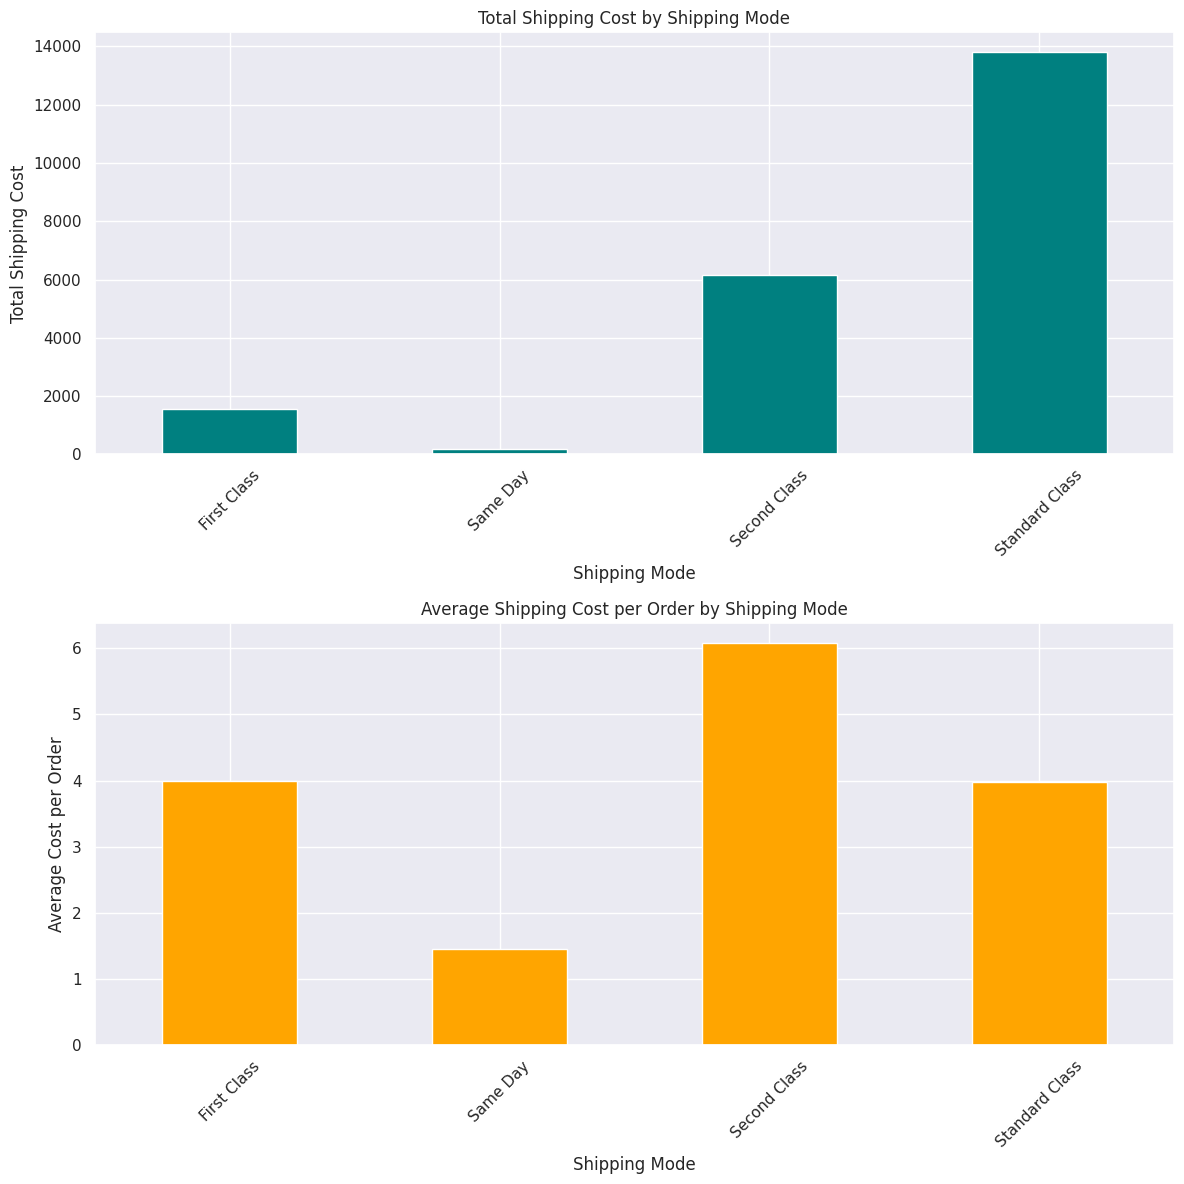

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the ShippingData.csv and OrderData.csv files
shipping_data = pd.read_csv('https://raw.githubusercontent.com/christopherguzmansilva93/phyton-project/main/ShippingData.csv')
order_data = pd.read_html(str(BeautifulSoup(requests.get('https://fakeaccountfornow.github.io/BA/').text, 'html.parser').find('table')),header=0)[0]



# Ensure the Order_Id columns are of the same data type in both dataframes
shipping_data['Order_Id'] = shipping_data['Order_Id'].astype(str)
order_data['Order_Id'] = order_data['Order_Id'].astype(str)

# Assuming hypothetical cost factors for each shipping mode
shipping_cost_factors = {'Standard Class': 1, 'Second Class': 1.5, 'First Class': 2, 'Same Day': 2.5}

# Merging the shipping data with order data
merged_shipping_order_data = pd.merge(shipping_data, order_data, on='Order_Id')

# Calculating total shipping cost per order based on shipping mode
merged_shipping_order_data['Shipping_Cost'] = merged_shipping_order_data['Shipping_Mode'].map(shipping_cost_factors) * merged_shipping_order_data['Days_for_shipping_real']

# Grouping data by shipping mode to analyze total and average shipping costs
shipping_cost_analysis = merged_shipping_order_data.groupby('Shipping_Mode').agg({'Shipping_Cost': ['sum', 'mean']})

# Visualizing the shipping cost analysis in one graph with subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Bar plot for total shipping cost by shipping mode
shipping_cost_analysis['Shipping_Cost']['sum'].plot(kind='bar', color='teal', ax=axs[0])
axs[0].set_title('Total Shipping Cost by Shipping Mode')
axs[0].set_ylabel('Total Shipping Cost')
axs[0].set_xlabel('Shipping Mode')
axs[0].tick_params('x', rotation=45)

# Bar plot for average shipping cost per order by shipping mode
shipping_cost_analysis['Shipping_Cost']['mean'].plot(kind='bar', color='orange', ax=axs[1])
axs[1].set_title('Average Shipping Cost per Order by Shipping Mode')
axs[1].set_ylabel('Average Cost per Order')
axs[1].set_xlabel('Shipping Mode')
axs[1].tick_params('x', rotation=45)

plt.tight_layout()
plt.show()

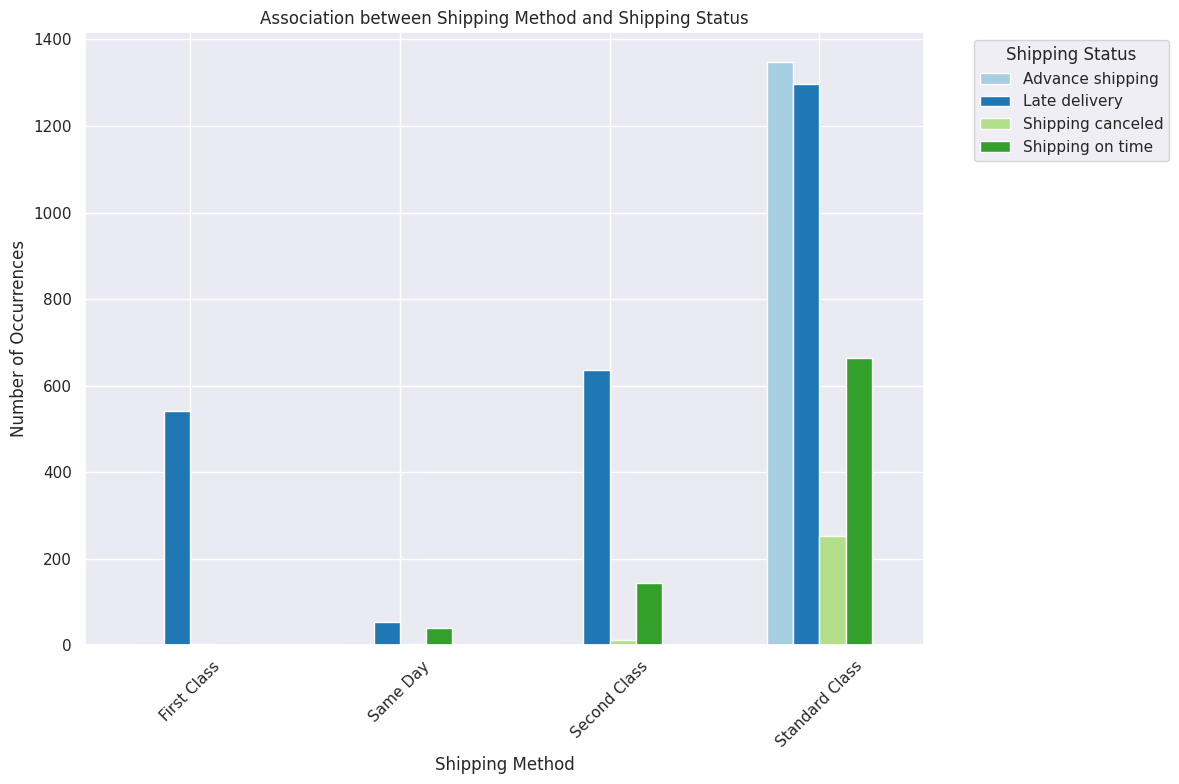

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the ShippingData.csv file
shipping_data = pd.read_csv('https://raw.githubusercontent.com/christopherguzmansilva93/phyton-project/main/ShippingData.csv')

# Check if the necessary columns exist
if 'Shipping_Mode' in shipping_data.columns and 'Delivery_Status' in shipping_data.columns:
    # Create a crosstabulation of shipping method and delivery status
    shipping_method_status = pd.crosstab(shipping_data['Shipping_Mode'], shipping_data['Delivery_Status'])

    # Visualizing the crosstab with distinct colors for each shipping status
    plt.figure(figsize=(12, 8))
    shipping_method_status.plot(kind='bar', stacked=False, color=plt.cm.Paired.colors, ax=plt.gca())
    plt.title('Association between Shipping Method and Shipping Status')
    plt.xlabel('Shipping Method')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45)
    plt.legend(title='Shipping Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Required information for analysis (Shipping Mode and/or Delivery Status) is not available in the dataset.")

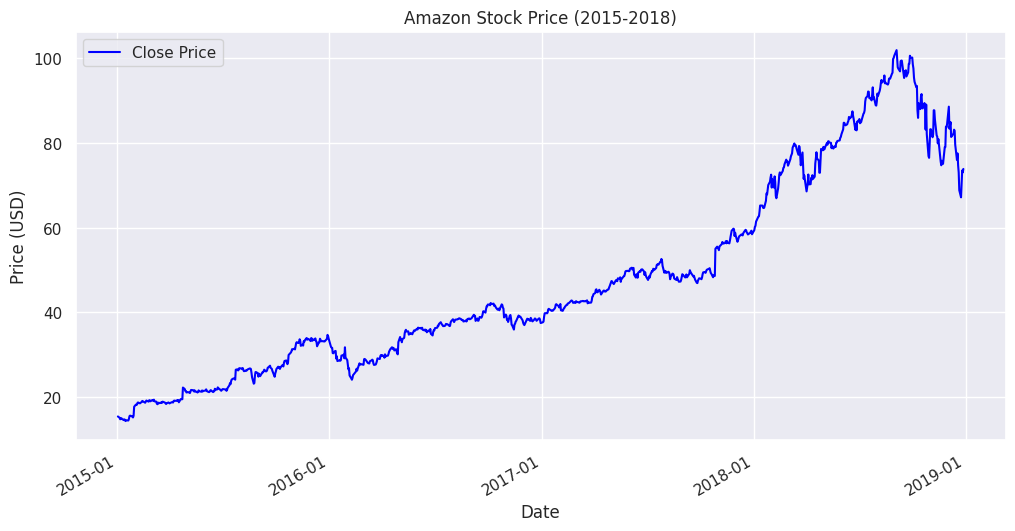

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the CSV file into a DataFrame

amazon_stock_data = pd.read_csv('https://raw.githubusercontent.com/christopherguzmansilva93/phyton-project/main/AMZN.csv')

# Convert the 'Date' column to datetime format
amazon_stock_data['Date'] = pd.to_datetime(amazon_stock_data['Date'])

# Filter data from 2015 to 2018
start_date = '2015-01-01'
end_date = '2018-12-31'
filtered_data = amazon_stock_data[(amazon_stock_data['Date'] >= start_date) & (amazon_stock_data['Date'] <= end_date)]

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Close Price', color='blue')
plt.title('Amazon Stock Price (2015-2018)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

# Formatting the date axis for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.show()


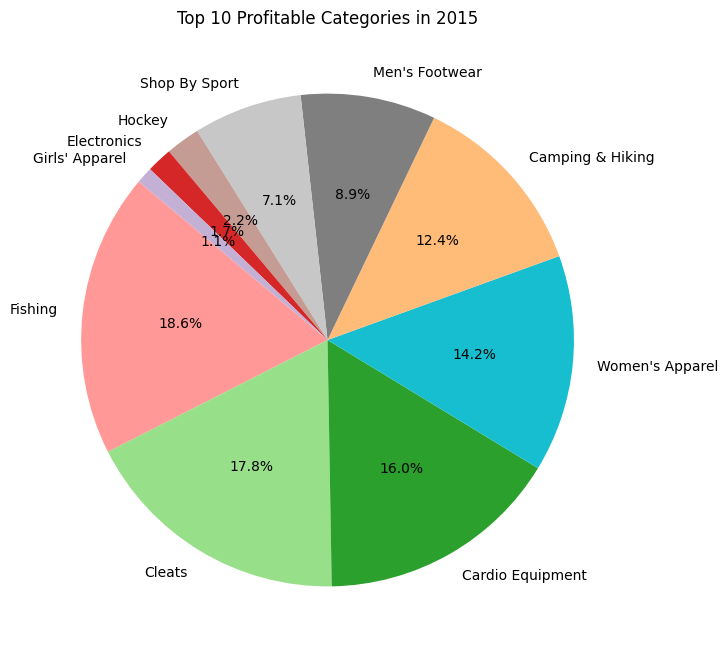

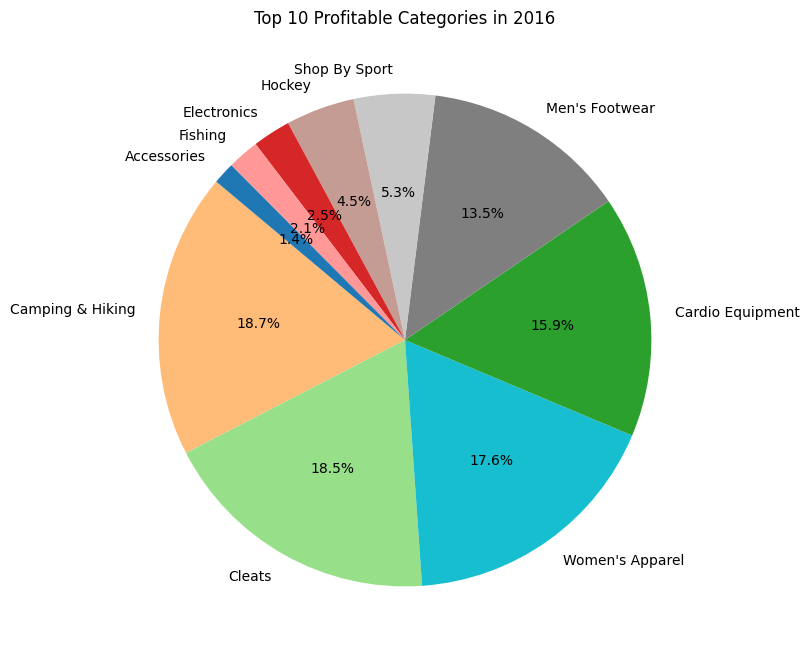

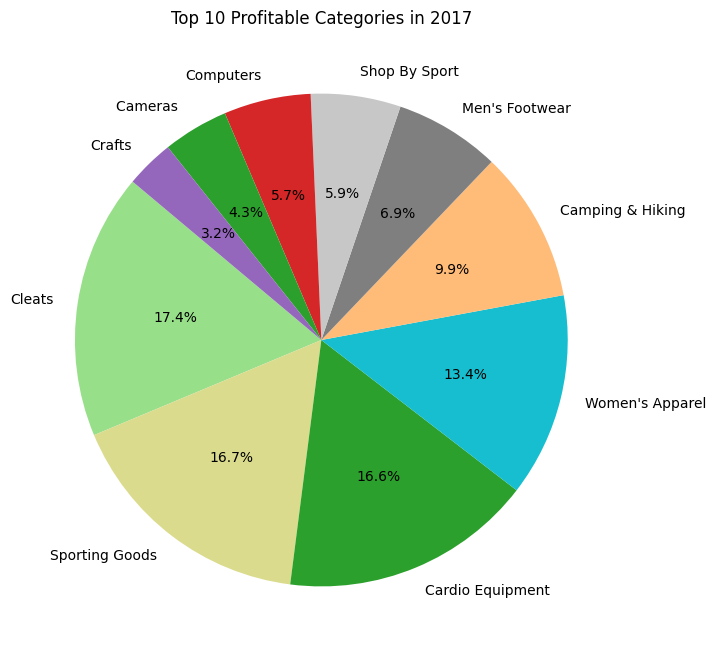

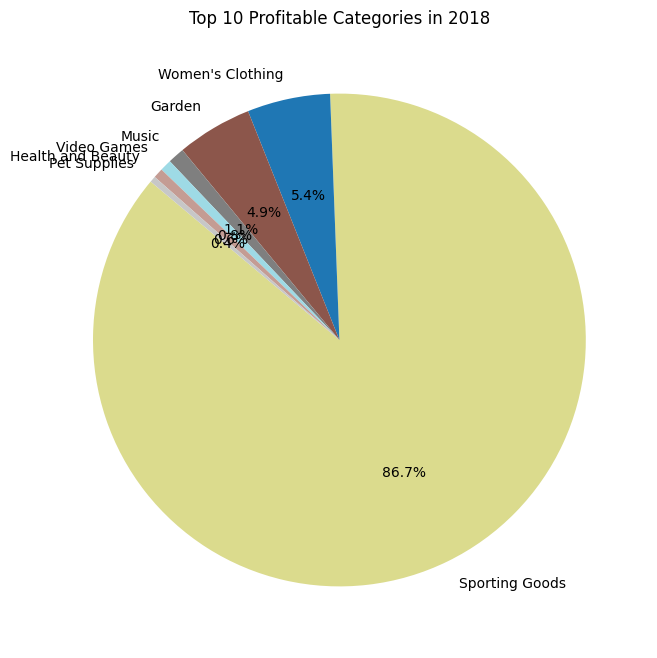

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the OrderData.csv and ProductData.csv files
order_data = pd.read_csv('/content/OrderData.csv')
product_data = pd.read_csv('/content/ProductData.csv')

# Convert 'Order_Profit_Per_Order' to numeric and exclude negative profits
order_data['Order_Profit_Per_Order'] = pd.to_numeric(order_data['Order_Profit_Per_Order'], errors='coerce')
order_data = order_data[order_data['Order_Profit_Per_Order'] >= 0]

# Safe conversion of order dates to datetime
order_data['order_date_DateOrders'] = pd.to_datetime(order_data['order_date_DateOrders'], errors='coerce')

# Remove rows with NaT in 'order_date_DateOrders'
order_data = order_data.dropna(subset=['order_date_DateOrders'])

# Extract the year from the order date
order_data['Year'] = order_data['order_date_DateOrders'].dt.year

# Ensure that merging columns are of the same data type (string)
order_data['Order_Item_Cardprod_Id'] = order_data['Order_Item_Cardprod_Id'].astype(str)
product_data['Product_Card_Id'] = product_data['Product_Card_Id'].astype(str)

# Merge order_data with product_data to get category information
merged_data = pd.merge(order_data, product_data, left_on='Order_Item_Cardprod_Id', right_on='Product_Card_Id')

# Group by Year and Category, then sum the profits
category_profit_by_year = merged_data.groupby(['Year', 'Category_Name'])['Order_Profit_Per_Order'].sum().reset_index()

# Get unique categories across all years
unique_categories = category_profit_by_year['Category_Name'].unique()

# Generate a diverse color palette
palette = sns.color_palette("tab20", len(unique_categories))
category_colors = {cat: col for cat, col in zip(unique_categories, palette)}

# Creating pie charts for each valid year
for year in sorted(order_data['Year'].unique()):
    # Filter the data for the specific year
    year_data = category_profit_by_year[category_profit_by_year['Year'] == year]

    # Sort and get the top 10 categories
    top_categories = year_data.nlargest(10, 'Order_Profit_Per_Order')

    # Assign distinct colors to categories
    colors = [category_colors[cat] for cat in top_categories['Category_Name']]

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.pie(top_categories['Order_Profit_Per_Order'], labels=top_categories['Category_Name'], autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Top 10 Profitable Categories in {int(year)}')
    plt.show()










     Year     Order_Region     Category_Name         Sales
2    2015        Caribbean  Cardio Equipment   5819.430046
17   2015  Central America            Cleats  18836.860687
34   2015     Eastern Asia           Fishing   5999.700165
49   2015  Northern Europe           Fishing   6799.660187
62   2015          Oceania           Fishing   9199.540253
85   2015    South America   Women's Apparel   8450.000000
87   2015       South Asia  Camping & Hiking   4799.680176
105  2015   Southeast Asia           Fishing   8399.580231
116  2015  Southern Europe            Cleats   9118.480320
132  2015   Western Europe            Cleats  17337.110516
145  2016           Canada            Cleats   1439.760056
159  2016   Central Africa   Women's Apparel   1300.000000
164  2016     Central Asia    Men's Footwear   1429.890060
170  2016      East Africa  Cardio Equipment   2399.759949
180  2016      East of USA  Cardio Equipment   3659.640045
193  2016     Eastern Asia  Camping & Hiking   3599.7601

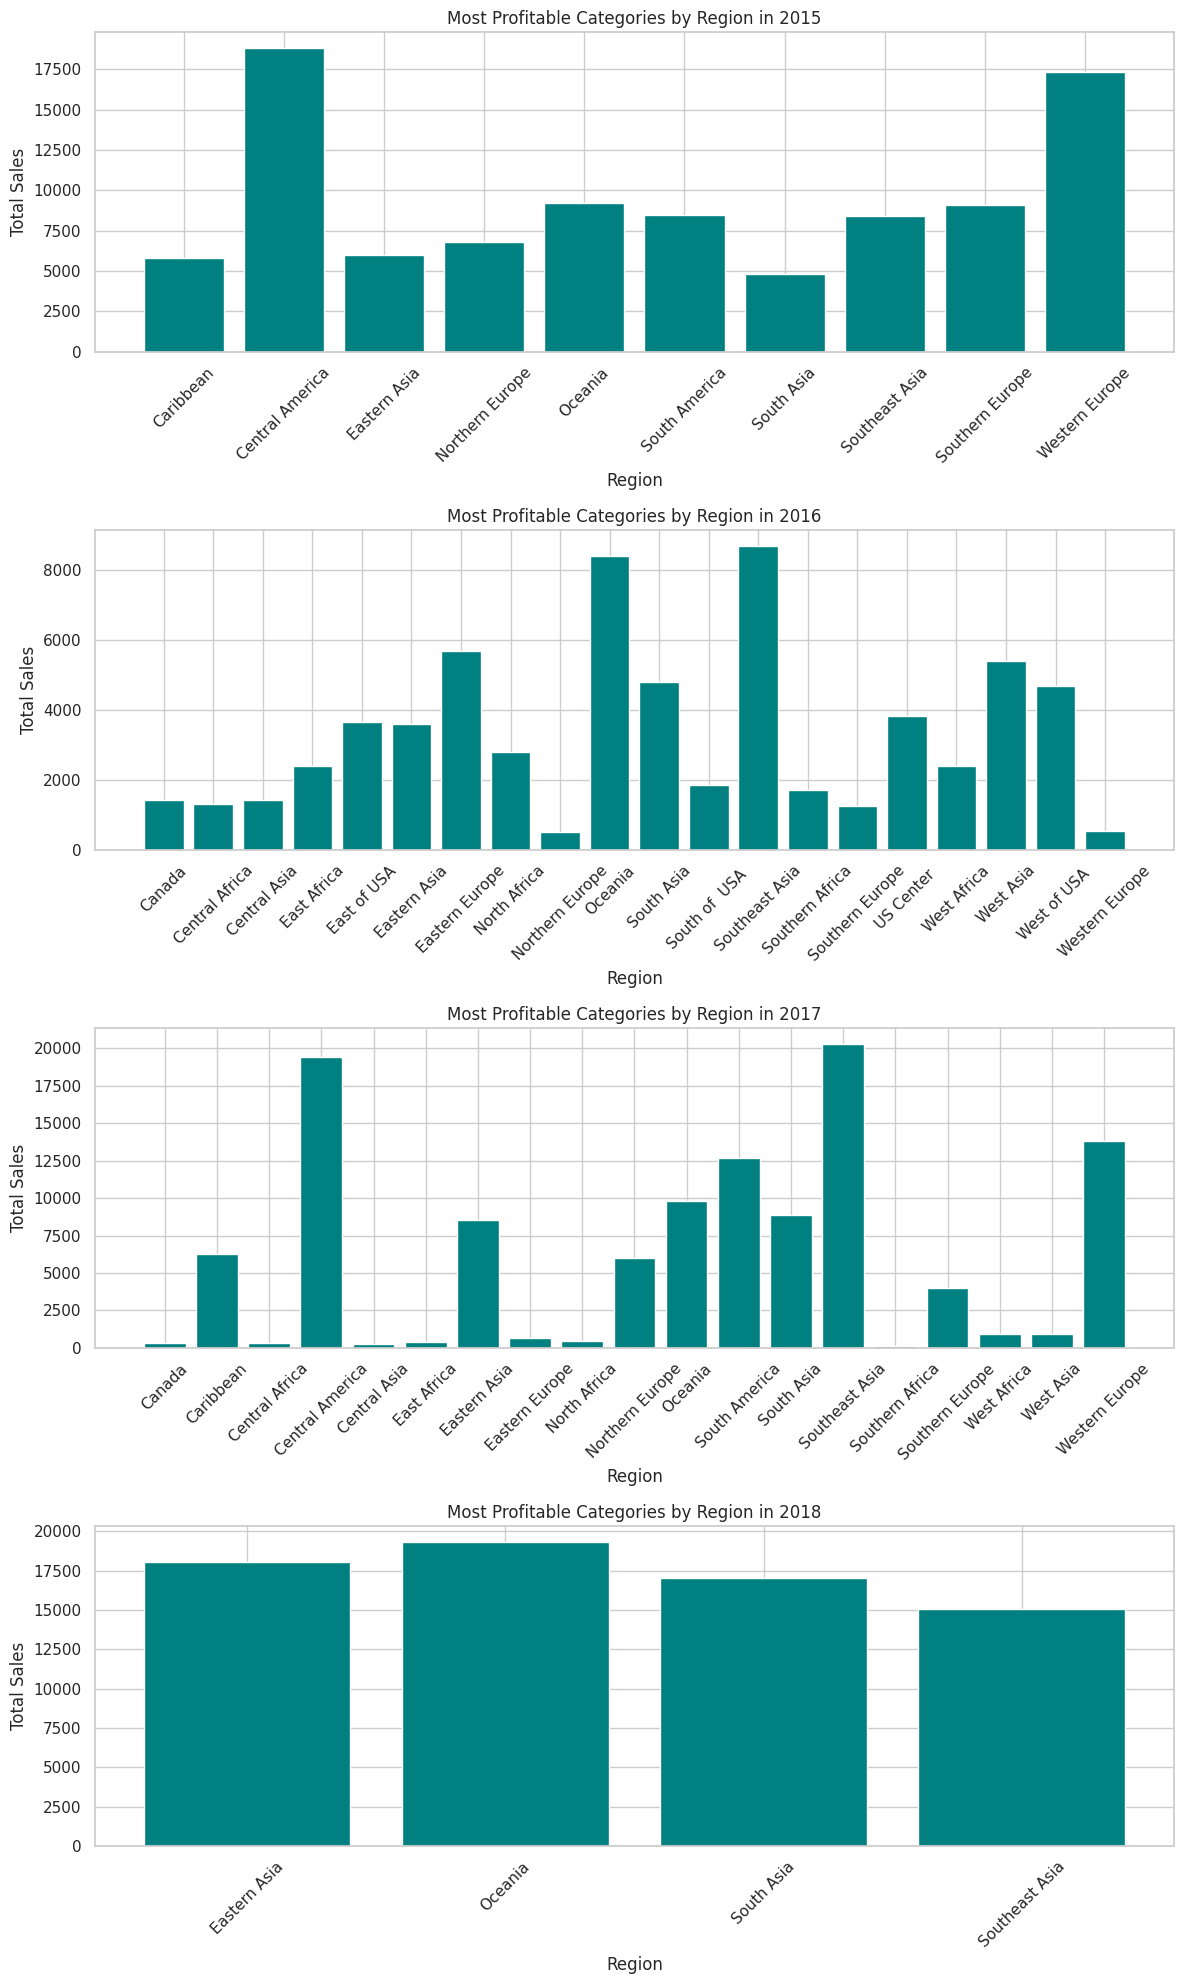

In [ ]:
import pandas as pd

# Load the OrderData.csv and ProductData.csv files
order_data = pd.read_csv('/content/OrderData.csv')
product_data = pd.read_csv('/content/ProductData.csv')

# Ensure that merging columns are of the same data type (string)
order_data['Order_Item_Cardprod_Id'] = order_data['Order_Item_Cardprod_Id'].astype(str)
product_data['Product_Card_Id'] = product_data['Product_Card_Id'].astype(str)

# Safe conversion of order dates to datetime
order_data['order_date_DateOrders'] = pd.to_datetime(order_data['order_date_DateOrders'], errors='coerce')

# Filter out rows with invalid dates
order_data = order_data.dropna(subset=['order_date_DateOrders'])

# Extract the year from the order date
order_data['Year'] = order_data['order_date_DateOrders'].dt.year

# Merge order_data with product_data
merged_data = pd.merge(order_data, product_data, left_on='Order_Item_Cardprod_Id', right_on='Product_Card_Id')

# Filter for years 2015-2018
filtered_data = merged_data[merged_data['Year'].between(2015, 2018)]

# Grouping by year, region, and category, then summing sales
sales_by_year_region_category = filtered_data.groupby(['Year', 'Order_Region', 'Category_Name']).agg({'Sales': 'sum'}).reset_index()

# Finding the category with the highest sales in each region for each year
max_sales_by_year_region = sales_by_year_region_category.loc[sales_by_year_region_category.groupby(['Year', 'Order_Region'])['Sales'].idxmax()]

print(max_sales_by_year_region)
import matplotlib.pyplot as plt

# Assuming max_sales_by_year_region is the DataFrame obtained from the previous analysis
# Setting up the figure for 4 subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 20))

# Iterating through each year to create a separate bar plot
for i, year in enumerate(range(2015, 2019)):
    # Filter data for the specific year
    year_data = max_sales_by_year_region[max_sales_by_year_region['Year'] == year]

    # Plotting the data for the year
    axs[i].bar(year_data['Order_Region'], year_data['Sales'], color='teal')
    axs[i].set_title(f'Most Profitable Categories by Region in {year}')
    axs[i].set_xlabel('Region')
    axs[i].set_ylabel('Total Sales')
    axs[i].tick_params('x', rotation=45)

plt.tight_layout()
plt.show()





